In [1]:
import glob, os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
def trim_drop(profile):
    change = np.diff(profile[:,1])
    idx = np.argmin(change)
    return profile[:idx+1]

def getprofile(df,id):
    return df[df['profile'] == id]

def getlocalpowerlawexponent(points):
    x = np.log(points[:,0])
    y = np.log(points[:,1])

    return np.linalg.lstsq(np.vstack([x,np.ones_like(x)]).T,y)[0][0]


KeyError: 'profile'

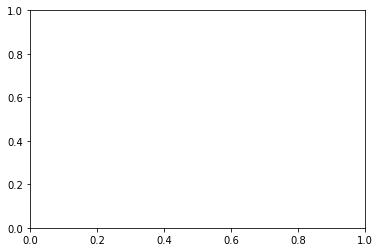

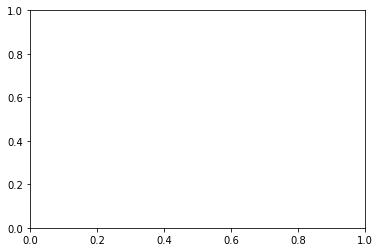

In [9]:
folder = r'X:\20220113_surface_sampling_samples\20220823_beza_direct_tension_top'
perp_hhcorr = glob.glob(folder+r'\perp\*.csv')
perp_roughness = pd.DataFrame()
for i,hhcorr in enumerate(perp_hhcorr):
    profile = trim_drop(np.genfromtxt(hhcorr,delimiter=','))
    data = pd.DataFrame({'delta_x':profile[:,0],'delta_h':profile[:,1]})
    data['profile'] = i
    perp_roughness = pd.concat([perp_roughness,data])
par_hhcorr =  glob.glob(folder+r'\par\*.csv')
par_roughness = pd.DataFrame()
for i,hhcorr in enumerate(par_hhcorr):
    profile = trim_drop(np.genfromtxt(hhcorr,delimiter=','))
    data = pd.DataFrame({'delta_x':profile[:,0],'delta_h':profile[:,1]})
    data['profile'] = i
    par_roughness = pd.concat([par_roughness,data])

n_samples = 10
exp_fig,exp_ax = plt.subplots()
hh_fig,hh_ax = plt.subplots()
for i in range(perp_roughness['profile'].max()):
    hhcorr = getprofile(perp_roughness,i)
    hhcorr = np.vstack([hhcorr['delta_x'],hhcorr['delta_h']]).T
    exp_perp = np.array([getlocalpowerlawexponent(hhcorr[i:i+n_samples])for i in range(hhcorr.shape[0]-n_samples)])

    exp_ax.semilogx(hhcorr[:-n_samples,0],exp_perp,'-x')

    
    hh_ax.loglog(hhcorr[:-n_samples,0],hhcorr[:-n_samples,1],'-x')

for i in range(par_roughness['profile'].max()):
    hhcorr = getprofile(par_roughness,i)
    hhcorr = np.vstack([hhcorr['delta_x'],hhcorr['delta_h']]).T
    exp_perp = np.array([getlocalpowerlawexponent(hhcorr[i:i+n_samples])for i in range(hhcorr.shape[0]-n_samples)])

    exp_ax.semilogx(hhcorr[:-n_samples,0],exp_perp,'--^')

    
    hh_ax.loglog(hhcorr[:-n_samples,0],hhcorr[:-n_samples,1],'--^')


In [8]:
data

,delta_x,delta_h,profile
0,-0.004225,0.234448,19
1,0.013070,0.239230,19
2,0.030316,0.240596,19
3,0.047555,0.241460,19
4,0.064808,0.243327,19
...,...,...,...
875,15.069160,0.279191,19
876,15.086218,0.267553,19
877,15.103242,0.253625,19
878,15.120262,0.239325,19
